Titanic Project to predcit the whether the passenger would survive or not.Its a classification problem

In [351]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
import scipy
from scipy import stats
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

In [352]:
#lets reaad the csv file
Ti=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
Ti

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [353]:
Titanic=pd.DataFrame(data=Ti)
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [354]:
#Lets read the number of columns
Titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [355]:
#Lets drop the columns not needed for the analysis
Titanic_N=Titanic.drop(["PassengerId","Name","Ticket","Cabin","Embarked"],axis=1)
Titanic_N

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [356]:
#Lets find missing values
Titanic_N.isnull().sum()
#There are missing values in Age

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [357]:
#Lets treat the missing values
Titanic_N["Age"]=Titanic_N.Age.fillna(Titanic_N.Age.mean())
Titanic_N["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [358]:
Titanic_N.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [359]:
#Lets use label encoder to conver Sex column to numeric values
le=LabelEncoder()
Titanic_N["Sex"]=le.fit_transform(Titanic_N["Sex"])
Titanic_N["Sex"]                                

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [360]:
Titanic_N.shape
#Total rows are 891 and 7 columns

(891, 7)

In [361]:
Titanic_N.dtypes
#All values are either float or interger types

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [362]:
Titanic_N.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [363]:
#the graphs will have some amount of skewness to the right s the mean is more than the median in most cases.Attribut fare will have the most skewness to the right compared to other attributes.
#Attribute fare seems to have some outliers since the differecne between the 75th percentile and max is the most.
#the standard deviation for fare is the most so the spread for this attribute is the most.

<AxesSubplot:xlabel='Pclass'>

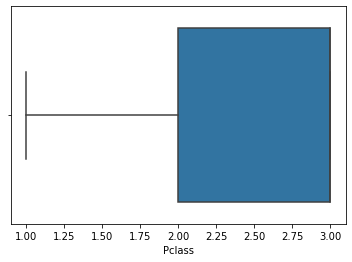

In [364]:
#Lets perform univariate analysis

sns.boxplot(x="Pclass",data=Titanic_N)
#The minimum value is 1 since the maximum value is the same as the 50th and the 75th percentile, there is no whisker on the maximum side.


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

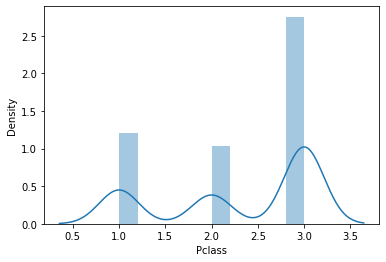

In [365]:
sns.distplot(Titanic_N["Pclass"])
#The density of of Pclass is the most around 3

<AxesSubplot:xlabel='Sex', ylabel='count'>

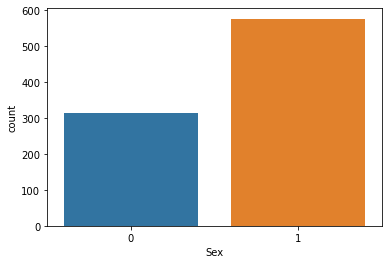

In [366]:
sns.countplot(Titanic_N["Sex"])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

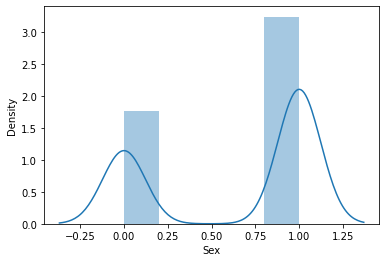

In [367]:
sns.distplot(Titanic_N["Sex"])
#The density of sex wither male or female is the most between0.75 to 1

<AxesSubplot:xlabel='Age'>

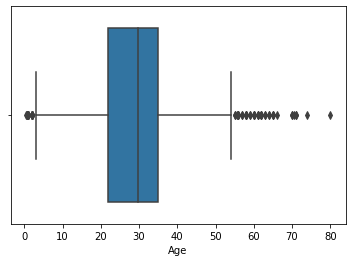

In [368]:
sns.boxplot(x="Age",data=Titanic_N)
#The minimum value is 0.5. The median value is 28 and the maximum value is 80.
# Outliers are present

<AxesSubplot:xlabel='Age', ylabel='Density'>

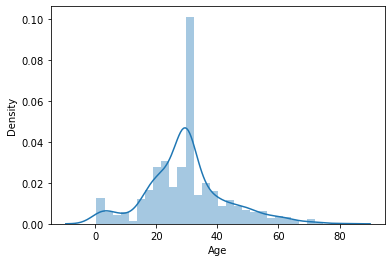

In [369]:
sns.distplot(Titanic_N["Age"])
#Right skewness is present as the density of age lies most between 20-40 years

<AxesSubplot:xlabel='SibSp'>

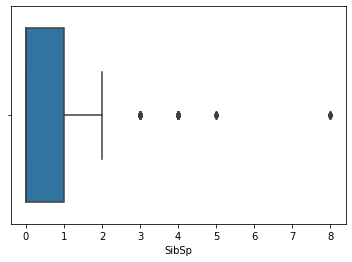

In [370]:
sns.boxplot(x="SibSp",data=Titanic_N)
#The minimum value is the same as the 50th and the 75th percentile, there is no whisker on the minimum side.
#Outliers are present but can be neglected as there are only 4 values

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

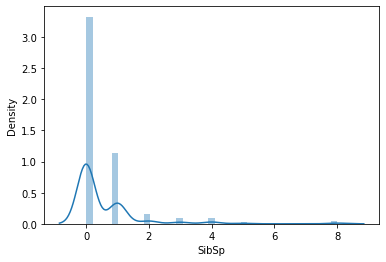

In [371]:
sns.distplot(Titanic_N["SibSp"])
#Right skewness is present as the density of SibSp is more at 0

<AxesSubplot:xlabel='Parch'>

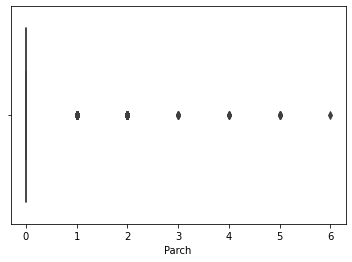

In [372]:
sns.boxplot(x="Parch",data=Titanic_N)
#The miimum, 25th ,50 and the 75th percentile are zero. Outliers are present

<AxesSubplot:xlabel='Parch', ylabel='Density'>

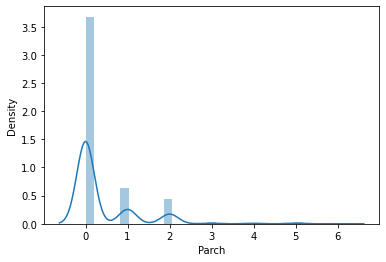

In [373]:
sns.distplot(Titanic_N["Parch"])
#Right skewness is present as the density of SibSp is more at 0

<AxesSubplot:xlabel='Fare'>

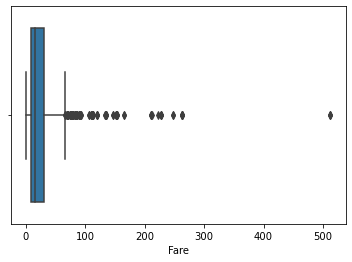

In [374]:
sns.boxplot(x="Fare",data=Titanic_N)
#Outliers are present. Minumum value is 0. Median is 15 and maximum value is 512 

In [375]:
#Lets perform bivariate analysis

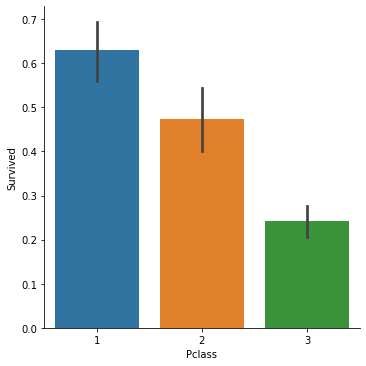

In [376]:
sns.catplot(x="Pclass",y="Survived",kind="bar",data=Titanic_N)
#The survival rate is the most in Pclass1 followed by 2 and 3

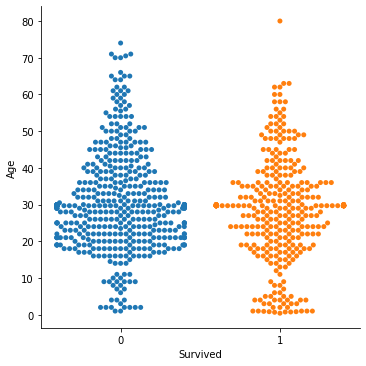

In [377]:
sns.catplot(x="Survived",y="Age",kind="swarm",data=Titanic_N)
#The maximum density lies around 20-30 years

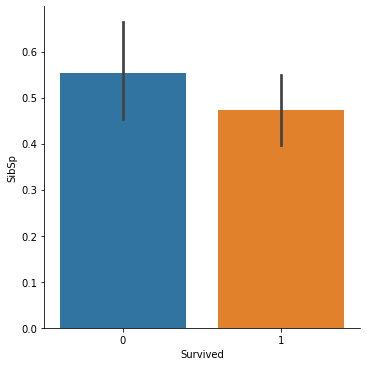

In [378]:
sns.catplot(x="Survived",y="SibSp",kind="bar",data=Titanic_N)
#the survival raate is maximum for Sibsp at 0

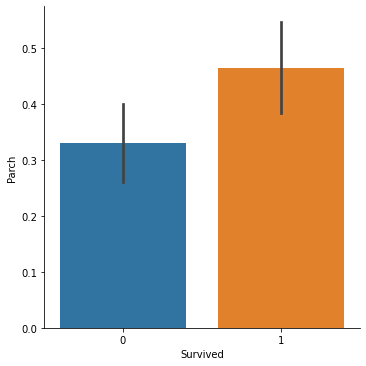

In [379]:
sns.catplot(x="Survived",y="Parch",kind="bar",data=Titanic_N)
# the survivale rate is maximum for parch at 1

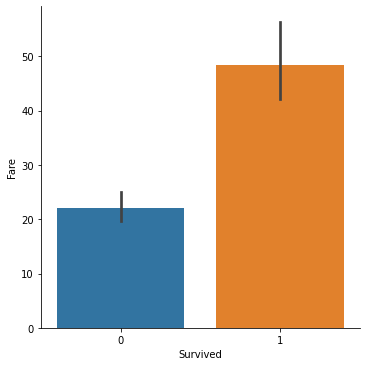

In [380]:
sns.catplot(x="Survived",y="Fare",kind="bar",data=Titanic_N)
# the survival rate is maximum for higher fare at 1

In [381]:
#lets remove outliers using zscore

In [382]:
zscore(Titanic_N)

array([[-0.78927234,  0.82737724,  0.73769513, ...,  0.43279337,
        -0.47367361, -0.50244517],
       [ 1.2669898 , -1.56610693, -1.35557354, ...,  0.43279337,
        -0.47367361,  0.78684529],
       [ 1.2669898 ,  0.82737724, -1.35557354, ..., -0.4745452 ,
        -0.47367361, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -1.35557354, ...,  0.43279337,
         2.00893337, -0.17626324],
       [ 1.2669898 , -1.56610693,  0.73769513, ..., -0.4745452 ,
        -0.47367361, -0.04438104],
       [-0.78927234,  0.82737724,  0.73769513, ..., -0.4745452 ,
        -0.47367361, -0.49237783]])

In [383]:
z=np.abs(zscore(Titanic_N))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.43279337, 0.47367361,
        0.50244517],
       [1.2669898 , 1.56610693, 1.35557354, ..., 0.43279337, 0.47367361,
        0.78684529],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.4745452 , 0.47367361,
        0.48885426],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 0.43279337, 2.00893337,
        0.17626324],
       [1.2669898 , 1.56610693, 0.73769513, ..., 0.4745452 , 0.47367361,
        0.04438104],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.4745452 , 0.47367361,
        0.49237783]])

In [384]:
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [385]:
Titanic_New=Titanic_N[(z<3).all(axis=1)]
Titanic_New

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


In [386]:
Titanic_New.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
dtype: float64

In [387]:
Titanic_New["Pclass"]=power_transform(Titanic_New["Pclass"].values.reshape(-1,1))
Titanic_New["SibSp"]=power_transform(Titanic_New["SibSp"].values.reshape(-1,1))
Titanic_New["Parch"]=power_transform(Titanic_New["Parch"].values.reshape(-1,1))
Titanic_New["Fare"]=power_transform(Titanic_New["Age"].values.reshape(-1,1))

In [388]:
Titanic_New.skew()

Survived    0.450825
Pclass     -0.429718
Sex        -0.664152
Age         0.318314
SibSp       0.948944
Parch       1.581505
Fare        0.071813
dtype: float64

In [389]:
#let separate x and y data to perform machine learning

In [390]:
x=Titanic_New.iloc[:,1:6]
x

,Pclass,Sex,Age,SibSp,Parch
0,0.872830,1,22.000000,1.551886,-0.484693
1,-1.470676,0,38.000000,1.551886,-0.484693
2,0.872830,0,26.000000,-0.633505,-0.484693
3,-1.470676,0,35.000000,1.551886,-0.484693
4,0.872830,1,35.000000,-0.633505,-0.484693
...,...,...,...,...,...
886,-0.595500,1,27.000000,-0.633505,-0.484693
887,-1.470676,0,19.000000,-0.633505,-0.484693
888,0.872830,0,29.699118,1.551886,2.086654
889,-1.470676,1,26.000000,-0.633505,-0.484693


In [391]:
y=Titanic_New["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

In [392]:
S=StandardScaler()
x=S.fit_transform(x)
x

array([[ 0.87283049,  0.72203588, -0.64170188,  1.55188616, -0.48469263],
       [-1.47067587, -1.38497273,  0.67582054,  1.55188616, -0.48469263],
       [ 0.87283049, -1.38497273, -0.31232128, -0.63350532, -0.48469263],
       ...,
       [ 0.87283049, -1.38497273, -0.00771687,  1.55188616,  2.08665417],
       [-1.47067587,  0.72203588, -0.31232128, -0.63350532, -0.48469263],
       [ 0.87283049,  0.72203588,  0.18174963, -0.63350532, -0.48469263]])

In [393]:
x.shape

(820, 5)

In [394]:
y.shape

(820,)

In [395]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(656, 5)
(164, 5)
(656,)
(164,)


Lets use four different algorithms to check the accuracy. We shall be using the following algorithms:
1)Logistic Regression
2)KNN
3)Randomforest
4)Adaboost

In [396]:
#Logistic Regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
#Lets predict the y values
pred1=lg.predict(x_test)
print(accuracy_score(pred1,y_test))
print(confusion_matrix(pred1,y_test))
print(classification_report(pred1,y_test))
score1=cross_val_score(lg,x,y,cv=5)
print(score1)
print(score1.mean())
print(score1.std())

0.8353658536585366
[[93 16]
 [11 44]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       109
           1       0.73      0.80      0.77        55

    accuracy                           0.84       164
   macro avg       0.81      0.83      0.82       164
weighted avg       0.84      0.84      0.84       164

[0.82317073 0.80487805 0.76829268 0.78658537 0.79878049]
0.7963414634146342
0.01833328826630841


In [397]:
#KNN
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
#lets predict y values
pred2=knn.predict(x_test)
print(accuracy_score(pred2,y_test))
print(confusion_matrix(pred2,y_test))
print(classification_report(pred2,y_test))
score2=cross_val_score(knn,x,y,cv=5)
print(score2)
print(score2.mean())
print(score2.std())

0.8292682926829268
[[92 16]
 [12 44]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       108
           1       0.73      0.79      0.76        56

    accuracy                           0.83       164
   macro avg       0.81      0.82      0.81       164
weighted avg       0.83      0.83      0.83       164

[0.79268293 0.81097561 0.81707317 0.81097561 0.8597561 ]
0.8182926829268293
0.02228739863719152


In [398]:
#Randomforest
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
#lets predict y values
pred3=rf.predict(x_test)
print(accuracy_score(pred3,y_test))
print(confusion_matrix(pred3,y_test))
print(classification_report(pred3,y_test))
score3=cross_val_score(rf,x,y,cv=5)
print(score3)
print(score3.mean())
print(score3.std())

0.8292682926829268
[[91 15]
 [13 45]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       106
           1       0.75      0.78      0.76        58

    accuracy                           0.83       164
   macro avg       0.81      0.82      0.81       164
weighted avg       0.83      0.83      0.83       164

[0.74390244 0.79878049 0.82926829 0.80487805 0.79878049]
0.7951219512195122
0.02796913400287735


In [399]:
#Adaboost
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
#lets predict y values
pred4=ad.predict(x_test)
print(accuracy_score(pred4,y_test))
print(confusion_matrix(pred4,y_test))
print(classification_report(pred4,y_test))
score4=cross_val_score(ad,x,y,cv=5)
print(score4)
print(score4.mean())
print(score4.std())

0.8048780487804879
[[88 16]
 [16 44]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       104
           1       0.73      0.73      0.73        60

    accuracy                           0.80       164
   macro avg       0.79      0.79      0.79       164
weighted avg       0.80      0.80      0.80       164

[0.80487805 0.7804878  0.79268293 0.82317073 0.83536585]
0.8073170731707316
0.019889641988170812


In [400]:
#Adaboost seems to be the best fit model.

In [401]:
#randomizedsearchcv
parameters={"n_estimators":[60,70,50,40],"learning_rate":[0.8,1,1.2,0.3],"algorithm":["SAMME","SAMME.R"],"random_state":[50,42,60,80] }
rsearch=RandomizedSearchCV(ad,parameters)
rsearch.fit(x_train,y_train)

RandomizedSearchCV(estimator=AdaBoostClassifier(),
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.8, 1, 1.2, 0.3],
                                        'n_estimators': [60, 70, 50, 40],
                                        'random_state': [50, 42, 60, 80]})

In [402]:
print(rsearch.best_estimator_)
print(rsearch.best_params_)
print(rsearch.best_score_)

AdaBoostClassifier(algorithm='SAMME', learning_rate=1.2, n_estimators=60,
                   random_state=60)
{'random_state': 60, 'n_estimators': 60, 'learning_rate': 1.2, 'algorithm': 'SAMME'}
0.8093684941013185


In [403]:
#lets use these parameters in the model
ad=AdaBoostClassifier(algorithm="SAMME",learning_rate=1.2,n_estimators=60,random_state=80)
ad.fit(x_train,y_train)
#lets predict y values
pred4=ad.predict(x_test)
print(accuracy_score(pred4,y_test))
print(confusion_matrix(pred4,y_test))
print(classification_report(pred4,y_test))

0.8353658536585366
[[94 17]
 [10 43]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       111
           1       0.72      0.81      0.76        53

    accuracy                           0.84       164
   macro avg       0.81      0.83      0.82       164
weighted avg       0.84      0.84      0.84       164



In [404]:
y_pred_prob=ad.predict_proba(x_test)[:,1]
y_pred_prob

array([0.44129008, 0.44129008, 0.44129008, 0.44129008, 0.5395427 ,
       0.57640034, 0.44129008, 0.49620837, 0.56361017, 0.41683467,
       0.44129008, 0.44129008, 0.44129008, 0.49620837, 0.44129008,
       0.63778521, 0.57640034, 0.47190666, 0.56361017, 0.51209783,
       0.44129008, 0.47127669, 0.44129008, 0.57311676, 0.49620837,
       0.54852821, 0.44129008, 0.46226094, 0.57311676, 0.5695851 ,
       0.57311676, 0.45405079, 0.44711234, 0.57311676, 0.47190666,
       0.47127669, 0.44129008, 0.47190666, 0.49620837, 0.42553377,
       0.44129008, 0.54915419, 0.44711234, 0.54317068, 0.48652355,
       0.47127669, 0.51844606, 0.44129008, 0.44129008, 0.47190666,
       0.48652355, 0.54915419, 0.46226094, 0.44129008, 0.51844606,
       0.41683467, 0.47127669, 0.51844606, 0.44129008, 0.47190666,
       0.57311676, 0.44129008, 0.41683467, 0.49620837, 0.44129008,
       0.47190666, 0.44129008, 0.44129008, 0.51844606, 0.47127669,
       0.44129008, 0.4847845 , 0.44129008, 0.57311676, 0.47127

In [405]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.         0.         0.
 0.         0.00961538 0.00961538 0.00961538 0.01923077 0.01923077
 0.09615385 0.09615385 0.09615385 0.14423077 0.15384615 0.17307692
 0.18269231 0.26923077 0.33653846 0.34615385 0.375      0.39423077
 0.40384615 0.47115385 0.91346154 0.94230769 0.95192308 0.99038462
 1.        ]
[0.         0.01666667 0.05       0.21666667 0.23333333 0.31666667
 0.33333333 0.36666667 0.5        0.53333333 0.58333333 0.6
 0.66666667 0.7        0.71666667 0.8        0.8        0.81666667
 0.81666667 0.83333333 0.86666667 0.86666667 0.86666667 0.86666667
 0.88333333 0.9        0.96666667 0.96666667 0.96666667 1.
 1.        ]
[1.63778521 0.63778521 0.57640034 0.57311676 0.5695851  0.56361017
 0.55734898 0.55230655 0.54852821 0.540952   0.5395427  0.52433096
 0.51844606 0.51209783 0.50876552 0.49620837 0.49349153 0.48652355
 0.4847845  0.47190666 0.47127669 0.46494837 0.46226094 0.45405079
 0.45257894 0.44711234 0.44129008 0.43175852 0.42553377 0.4

Text(0.5, 1.0, 'AdaBoost')

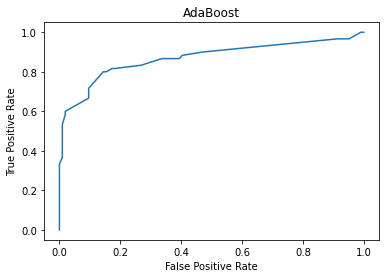

In [406]:
plt.plot(fpr,tpr,label="AdaBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AdaBoost")

In [407]:
#Lets perform serialisation
joblib.dump(ad,"adfile1.obj")
ad_from_joblib=joblib.load("adfile1.obj")